# Prepping up

In [1]:
!pip install vizdoom
!pip install matplotlib
!pip install torch torchvision
!pip install 'stable-baselines3[extra]'

In [9]:
from vizdoom import * 
import random
import time 
import numpy as np

In [10]:
# Setup game
game = DoomGame()
game.load_config('./ViZDoom/scenarios/deadly_corridor.cfg')
game.init()

In [11]:
# set of actions we can take in the environment
actions = np.identity(7, dtype=np.uint8)

In [ ]:
#game.new_episode()

In [ ]:
#game.is_episode_finished()

True

In [5]:
game.make_action(random.choice(actions))

0.0

In [12]:
state = game.get_state()
print(state.game_variables)
episodes = 5
for episode in range(episodes): 
    # Creating a new episode or game 
    game.new_episode()
    # Check if the game is done or not 
    while not game.is_episode_finished(): 
        # Geting the game state 
        state = game.get_state()
        # Geting the game image 
        img = state.screen_buffer
        # Geting the game variables - ammo
        info = state.game_variables
        # Taking an action
        reward = game.make_action(random.choice(actions),4)
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

[100.   0.   0.  -1.]
reward: 0.0
reward: 0.0
reward: 7.1137542724609375
reward: 1.4201812744140625
reward: -17.863388061523438
reward: -6.5386962890625
reward: 2.256072998046875
reward: 9.41876220703125
reward: 12.134017944335938
reward: 11.61700439453125
reward: 8.316497802734375
reward: -2.7038421630859375
reward: -102.07594299316406
Result: -76.90557861328125
reward: 0.0
reward: 0.0
reward: 0.0
reward: -10.407119750976562
reward: -5.4620513916015625
reward: 5.5503387451171875
reward: 12.20880126953125
reward: 9.337615966796875
reward: 9.4813232421875
reward: 14.329864501953125
reward: 12.844451904296875
reward: 8.663665771484375
reward: -18.824600219726562
reward: -15.985015869140625
reward: -10.21148681640625
reward: -12.4105224609375
reward: -9.8646240234375
reward: -5.2274322509765625
reward: 6.46514892578125
reward: 1.2905426025390625
reward: -5.3179779052734375
reward: -2.4205322265625
reward: -0.0263519287109375
reward: 2.8438262939453125
reward: 6.25537109375
reward: 5.71263

In [13]:
game.close()

# Custom Gymnasium

In [7]:
!pip install gymnasium

In [8]:
import gymnasium as gym
from gymnasium import Env
from gymnasium.spaces import Discrete, Box
import cv2


In [ ]:
# Creating gymnasium Custom Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False, config='./VizDoom/scenarios/deadly_corridor_s1.cfg'): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config(config)
        # Rendering the window by selection true or flase 
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Starting the game 
        self.game.init()
        
        # Creating the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(7)

        # Game Vars
        self.damage_taken = 0
        self.hitcount = 0
        self.ammo = 52
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step
        actions = np.identity(7)
        movement_reward = self.game.make_action(actions[action], 4) 
        reward = 0
         # Get all the other stuff we need to retun
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)

            # Reward Shaping
            game_variables = self.game.get_state().game_variables
            health, damage_taken, hitcount, ammo = game_variables

            # Calculating the rewards
            damage_taken_delta = -damage_taken + self.damage_taken
            self.damage_taken = damage_taken
            hitcount_delta = hitcount - self.hitcount
            self.hitcount = hitcount
            ammo_delta = ammo - self.ammo
            self.ammo = ammo

            reward = movement_reward + damage_taken_delta*10 + hitcount_delta*200  + ammo_delta*5 
            
            info =  ammo
        else:
            state = np.zeros(self.observation_space.shape, dtype=np.uint8)
            info = 0
        info = {"info":info}

        terminated = self.game.is_episode_finished()
        truncated = False  # VizDoom typically does not truncate

        return state, reward, terminated, truncated, info

    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)

        if seed is not None:
            self.game.set_seed(seed)

        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        state = self.grayscale(state)

        info = {}
        return state, info
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [18]:
env = VizDoomGym(render=True)

In [19]:
state, info = env.reset()

In [20]:
env.reset()

(array([[[ 5],
         [10],
         [ 7],
         ...,
         [ 4],
         [ 6],
         [10]],
 
        [[ 3],
         [ 3],
         [ 4],
         ...,
         [ 5],
         [ 3],
         [ 7]],
 
        [[11],
         [ 7],
         [10],
         ...,
         [ 9],
         [ 6],
         [ 6]],
 
        ...,
 
        [[75],
         [63],
         [62],
         ...,
         [44],
         [71],
         [60]],
 
        [[15],
         [48],
         [47],
         ...,
         [49],
         [69],
         [47]],
 
        [[22],
         [14],
         [26],
         ...,
         [57],
         [37],
         [39]]], shape=(100, 160, 1), dtype=uint8),
 {})

In [23]:
env.close()

In [21]:
# Import Environment checker
from stable_baselines3.common import env_checker
env_checker.check_env(env)

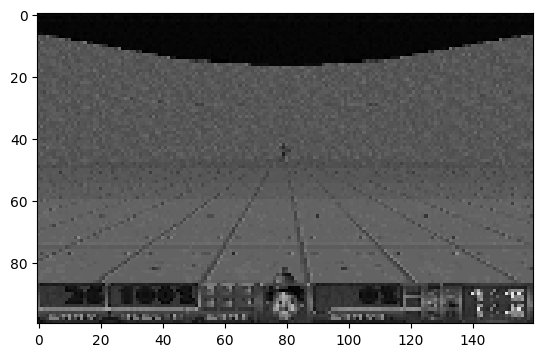

In [22]:
# Viewing the state in gray 
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [ ]:
# Callback def
import os 
from stable_baselines3.common.callbacks import BaseCallback
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

CHECKPOINT_DIR = './train/train_dc_map'
LOG_DIR = './logs/log_dc_map'
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [ ]:
# Trainig a ppo model
from stable_baselines3 import PPO
env = VizDoomGym(config='./VizDoom/scenarios/deadly_corridor_s1.cfg')
# If the games and maps are bigger then the n_steps should be increased and lr should be decreased, so that the learning will be slower 
# model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=4096, device="mps")
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.00001, n_steps=8192, clip_range=.1, gamma=.95, gae_lambda=.9, device="mps")

Using mps device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


We can do tensorboard --logdir=. to view the logs

In [ ]:
model.learn(total_timesteps=40000, callback=callback)

Logging to ./logs/log_def_map/PPO_1


In [64]:
# Testing the agent
from stable_baselines3.common.evaluation import evaluate_policy

model = PPO.load('./train/train_basic/best_model_60000')
# Create rendered environment
env = VizDoomGym(render=True)
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=20)
print('Mean reward:', mean_reward)
#model.predict(obs)
for episode in range(20): 
    obs, info= env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)


Mean reward: 79.05
Total Reward for episode 0 is 134.0
Total Reward for episode 1 is 190.0
Total Reward for episode 2 is 182.0
Total Reward for episode 3 is 158.0
Total Reward for episode 4 is 158.0
Total Reward for episode 5 is 174.0
Total Reward for episode 6 is 190.0
Total Reward for episode 7 is 158.0
Total Reward for episode 8 is 158.0
Total Reward for episode 9 is 190.0
Total Reward for episode 10 is 134.0
Total Reward for episode 11 is 142.0
Total Reward for episode 12 is 174.0
Total Reward for episode 13 is 182.0
Total Reward for episode 14 is 158.0
Total Reward for episode 15 is 150.0
Total Reward for episode 16 is 174.0
Total Reward for episode 17 is 174.0
Total Reward for episode 18 is 158.0
Total Reward for episode 19 is 134.0


In [65]:
env.close()